In [ ]:
!pip3 install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
from google.colab import files, drive
from skimage.transform import resize
import zipfile
import imutils
import pytesseract

%matplotlib inline

#1.1 OCR

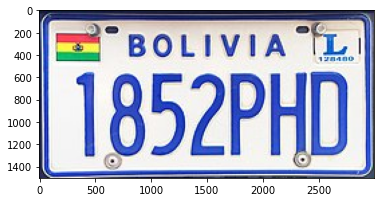

In [ ]:
# Read in the image
image = mpimg.imread('/content/Placa.jpg')
# resize the image and display it
resized = imutils.resize(image, width=3000)
plt.imshow(resized)

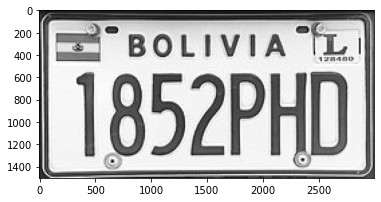

In [ ]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

(1500, 3000)

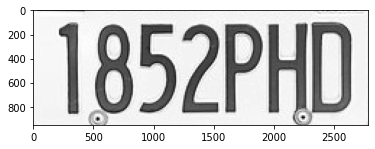

In [ ]:
placa = gray[450:1400,120:2900]
plt.imshow(placa, cmap='gray')

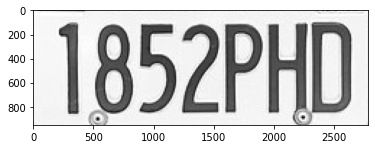

In [ ]:
# Applies gaussian blur with standar deviation  = 0 
kernel_size = 7
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian = cv2.GaussianBlur(placa,(kernel_size,kernel_size),0,0)
plt.imshow(gaussian, cmap='gray')

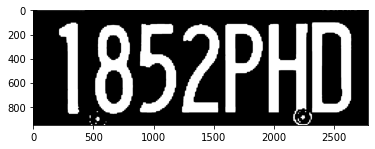

In [ ]:
ret, thresh = cv2.threshold(gaussian,150,200,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

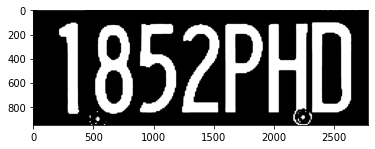

In [ ]:
s_1=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, s_1)
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, s_1)
plt.imshow(opening, cmap='gray')

In [ ]:
opening.shape

(950, 2780)

1852PHU



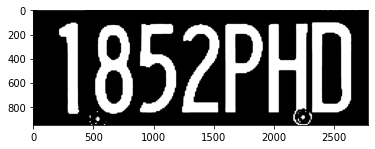

In [ ]:
text = pytesseract.image_to_string(opening, config='--psm 12')
plt.imshow(opening, cmap='gray')
print(text)

#1.2 Redes Neuronales Convolucionales

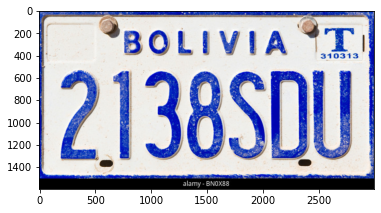

In [ ]:
# Read in the image
image_1 = mpimg.imread('/content/Placa_2.jpg')
# resize the image and display it
resized_1 = imutils.resize(image_1, width=3000)
plt.imshow(resized_1)

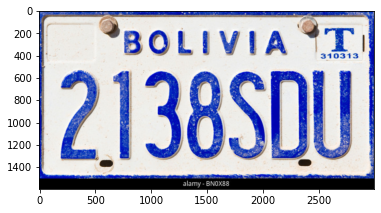

In [ ]:
# Applies gaussian blur with standar deviation  = 0 
kernel_size = 5
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian_1 = cv2.GaussianBlur(resized_1,(kernel_size,kernel_size),0,0)
plt.imshow(gaussian_1, cmap='gray')

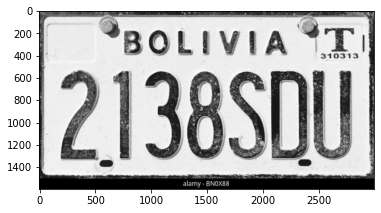

In [ ]:
# Convert to grayscale for filtering
gray_1 = cv2.cvtColor(gaussian_1, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_1, cmap='gray')

In [ ]:
gray_1.shape

(1593, 3000)

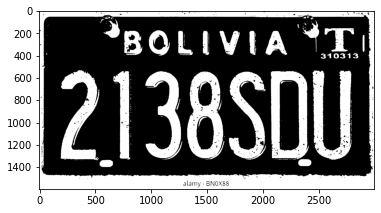

In [ ]:
ret, thresh_1 = cv2.threshold(gray_1,150,200,cv2.THRESH_BINARY_INV)
plt.imshow(thresh_1, cmap='gray')

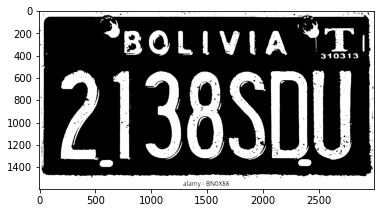

In [ ]:
s_1 = np.uint8([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0], 
                   [0, 0, 1, 0, 0], 
                    ])

opening_1 = cv2.morphologyEx(thresh_1, cv2.MORPH_OPEN, s_1)
opening_1 = cv2.morphologyEx(opening_1, cv2.MORPH_OPEN, s_1)
plt.imshow(opening_1, cmap='gray')

In [ ]:
opening_1.shape

(1593, 3000)

In [ ]:
def col(matriz):
    col = []
    sum = 0
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            sum = sum + matriz[i,j]
        col.append(sum)
        sum = 0
    return col

In [ ]:
a = opening_1.shape[0]/2
a = round(a)
copy1 = np.copy(opening_1[0:a,0:])
copy2 = np.copy(opening_1[a:,0:])

In [ ]:
col1 = col(copy1)
col2 = col(copy2)
column1 = np.array(col1)
column2 = np.array(col2)
min_col1 = np.min(column1)
min_col2 = np.min(column2)
indice1 = col1.index(min_col1)
indice2 = col2.index(min_col2)

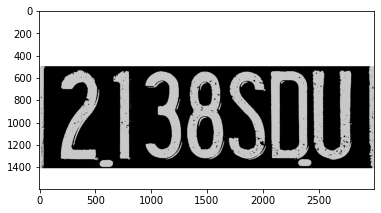

In [ ]:
copy = np.copy(opening_1)
copy[0:indice1,0:]=255
copy[indice2+a:,0:]=255
plt.imshow(copy, cmap='gray')

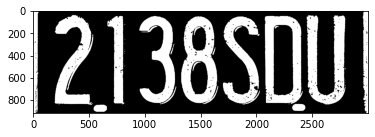

In [ ]:
placa = opening_1[indice1:indice2+a,0:]
plt.imshow(placa, cmap='gray')

In [ ]:
def filas(matriz):
    fil = []
    sum = 0
    for i in range(matriz.shape[1]):
        for j in range(matriz.shape[0]):
            sum = sum + matriz[j,i]
        fil.append(sum)
        sum = 0
    return fil

[87000, 85600, 84400, 84600, 83800, 83000, 83800, 84800, 85800, 86400, 85800, 85000, 85600, 87200, 88000, 86800, 86600, 85800, 84800, 83400, 82800, 81600, 81800, 81200, 80800, 81000, 81000, 81000, 80600, 80400, 81000, 80400, 79800, 78200, 77800, 77800, 77800, 78200, 77800, 77600, 77600, 77000, 78000, 77200, 77800, 77400, 78200, 77000, 76200, 76400, 75800, 75600, 75400, 74400, 74600, 77200, 78000, 76800, 76600, 76600, 76600, 76600, 76400, 76000, 76400, 75600, 74600, 73200, 73000, 74000, 74600, 73600, 73600, 73200, 74800, 73600, 70200, 70200, 70800, 72400, 70800, 69000, 69000, 70000, 71800, 70200, 70200, 70000, 70000, 71400, 70200, 70600, 70600, 71200, 70600, 68600, 68400, 68200, 69200, 67800, 66800, 66800, 67000, 67400, 67800, 68000, 68200, 70800, 71200, 71400, 71400, 72000, 72600, 73600, 72400, 73000, 73000, 73000, 71400, 70600, 70200, 71000, 72000, 72200, 73200, 73400, 72600, 75000, 75000, 75200, 76400, 82600, 84000, 84200, 85000, 88800, 92200, 92000, 91600, 92200, 91200, 90000, 89400

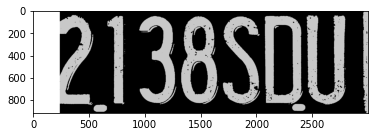

In [ ]:
a=300
#for i in range(7):
copy_for = np.copy(placa[0:,a:a+700])
fil=filas(copy_for)
fila = np.array(fil)
min_fil = np.min(fila)
indice1 = fil.index(min_fil)
copy = np.copy(placa)
copy[0:,0:indice1]=255
print(fil)
print(min_fil)
print(len(fil))
plt.imshow(copy, cmap='gray')

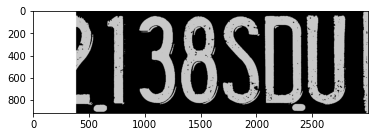

In [ ]:
indice1=0
b=0
copy = np.copy(opening_1)
for i in range(3):
    copy_for = np.copy(copy[0:,indice1:indice1+1500])
    fil=0
    fil=filas(copy_for)
    fila = np.array(fil)
    #indice1=np.where(fila == np.amin(fila)) # Se obtiene 4
    #indice1=np.round(indice1)
    min_fil = np.amin(fila)
    indice1 = fil.index(min_fil)
    copy = np.copy(placa)
    copy[0:,0:indice1+b]=255
    b=b+indice1
    plt.imshow(copy, cmap='gray')

